In [1]:
import numpy as np
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

print(X.shape)
print(y.shape)

(490, 13)
(490,)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.predict(X_test)

array([18.08015868, 25.52447165, 12.98271397, 32.89477638, 24.17839745,
        2.66600125, 26.64297716, 32.23866352, 13.96590659, 24.0465123 ,
       14.92963   , 10.57419644, 30.28539981, 16.28302365, 23.67843428,
       25.63288299, 18.68105783, 24.01767076, 28.77234863, 26.9404495 ,
       12.87158142, 27.23259283, 26.07726096, 23.41270932, 20.80570812,
       31.96527196, 14.93177657, 20.94927605, 12.93149157, 29.8004438 ,
       35.29188752,  4.99369317, 13.10904465, 35.54982047, 16.00603155,
       21.53889058, 12.46701001, 29.12202629, 27.3433202 , 24.04852968,
       14.39961539, 23.61075774, 10.89223868, 22.38043687, 18.62604579,
       16.41773634, 24.43040765, 33.06929581, 19.19757395, 27.03634216,
       18.05693565, 14.90744724, 25.08683225, 16.09610653, 21.7469388 ,
       16.32259928, 24.25418684, 11.75290906, 27.91347808, 31.06610342,
       20.17028271, 24.99229322, 25.99180978, 12.11816691, 16.57739596,
       27.30354042, 22.26700274, 21.72088347, 31.5072238 , 14.09

In [6]:
lin_reg.coef_ # 查看系数， 也就β1到βn

array([-1.20354261e-01,  3.64423279e-02, -3.61493155e-02,  5.12978140e-02,
       -1.15775825e+01,  3.42740062e+00, -2.32311760e-02, -1.19487594e+00,
        2.60101728e-01, -1.40219119e-02, -8.35430488e-01,  7.80472852e-03,
       -3.80923751e-01])

In [7]:
lin_reg.intercept_ # 查看截距

34.117399723229745

In [8]:
lin_reg.score(X_test, y_test)

0.8129794056212807

梯度下降

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [10]:
ss = StandardScaler()

In [11]:
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In [12]:
sgd_reg = SGDRegressor() # 对整个样本浏览多少次n_iters默认5
sgd_reg.fit(X_train_ss, y_train) # 使用随机梯度下降法fit
sgd_reg.score(X_test_ss, y_test)

0.8040891449189747

多项式回归

In [13]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [14]:
poly = PolynomialFeatures(degree = 2) # 最高2次方
poly.fit(X)
X2 = poly.transform(X)
X2.shape

(100, 3)

In [15]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_pred2 = lin_reg2.predict(X2)

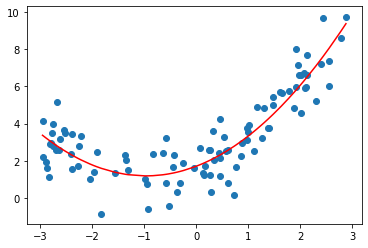

In [16]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_pred2[np.argsort(x)], color='r')
plt.show()

In [17]:
lin_reg2.intercept_

1.7138127024809287

In [18]:
lin_reg2.coef_

array([0.        , 1.07523595, 0.55306166])

关于PolynomialFeatures

In [19]:
X = np.arange(1, 11).reshape(-1,2)
X.shape

(5, 2)

In [20]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [21]:
poly1 = PolynomialFeatures(degree=2)
poly1.fit(X)
X2 = poly1.transform(X)
X2.shape

(5, 6)

In [22]:
X2 # 包含两个特征乘积的列和二次方，一次方，0次方的列

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

Pipeline

In [23]:
from sklearn.pipeline import Pipeline
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [24]:
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [25]:
poly_reg.fit(X, y)
y_pred = poly_reg.predict(X)

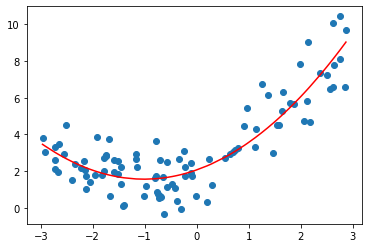

In [26]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_pred[np.argsort(x)], color='r')
plt.show()

岭回归 L2正则

In [27]:
from sklearn.linear_model import Ridge

In [28]:
def PolyNomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

In [29]:
from sklearn.metrics import mean_squared_error

poly_reg = PolyNomialRegression(degree=2)
poly_reg.fit(X, y)
y_pred = poly_reg.predict(X)

In [30]:
mean_squared_error(y_pred, y)

1.159785663565249

In [31]:
def PolyNomialRidge(degree, alpha): #alpha是正则化的超参数
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('ridge',  Ridge(alpha=alpha))
    ])

In [32]:
ridge_reg = PolyNomialRidge(degree=2, alpha=0.0000001)
ridge_reg.fit(X, y)
y_pred = ridge_reg.predict(X)
mean_squared_error(y_pred, y)

1.1597856635652488

In [33]:
def plot_model(model):
    x_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(x_plot)
    
    plt.scatter(x, y)
    plt.plot(x_plot[:,0], y_plot, color='r')
    plt.axis([-3,3,0,6])
    plt.show()

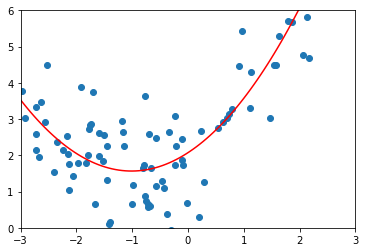

In [34]:
plot_model(ridge_reg)

LASSO L1正则化

In [35]:
from sklearn.linear_model import Lasso

In [36]:
def PolyNomialLasso(degree, alpha): #alpha是正则化的超参数
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lasso',  Lasso(alpha=alpha))
    ])

In [37]:
lasso = PolyNomialLasso(degree=2, alpha=0.01)
lasso.fit(X, y)
y_pred = lasso.predict(X)
mean_squared_error(y_pred, y)

1.1599856970229219

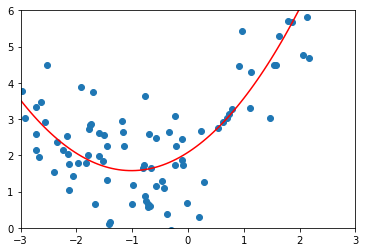

In [38]:
plot_model(lasso)

弹性网 也就是同时用L1（r）和L2（1-r）， r是L1权重;
L0 正则是讲θ的数量尽可能少， 少用

In [39]:
from sklearn.linear_model import ElasticNet

In [40]:
def PolyNomialNet(degree, alpha, l1_ratio): #alpha是正则化的超参数
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('elastic_net',  ElasticNet(alpha=alpha,l1_ratio=l1_ratio))
    ])

In [41]:
elastic = PolyNomialNet(degree=2, alpha=0.01, l1_ratio=0.5)
elastic.fit(X, y)
y_pred = lasso.predict(X)
mean_squared_error(y_pred, y)

1.1599856970229219

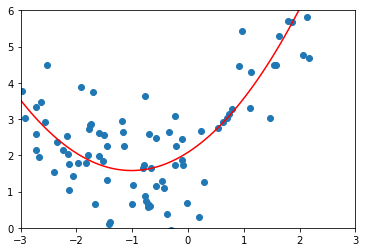

In [42]:
plot_model(elastic)

集成学习解决回归问题

In [45]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [47]:
bag_reg = BaggingRegressor(LinearRegression(),
                          n_estimators=500, max_samples=100,
                           bootstrap=True, # 样本个数放回取样
                            max_features=X.shape[1], # 最多看多少特征
                            bootstrap_features=True, # 样本特征也采用放回取样
                            oob_score=True)

bag_reg.fit(X, y)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                 bootstrap=True, bootstrap_features=True, max_features=13,
                 max_samples=100, n_estimators=500, n_jobs=None, oob_score=True,
                 random_state=None, verbose=0, warm_start=False)

In [49]:
bag_reg.oob_score_

0.7483783677220412

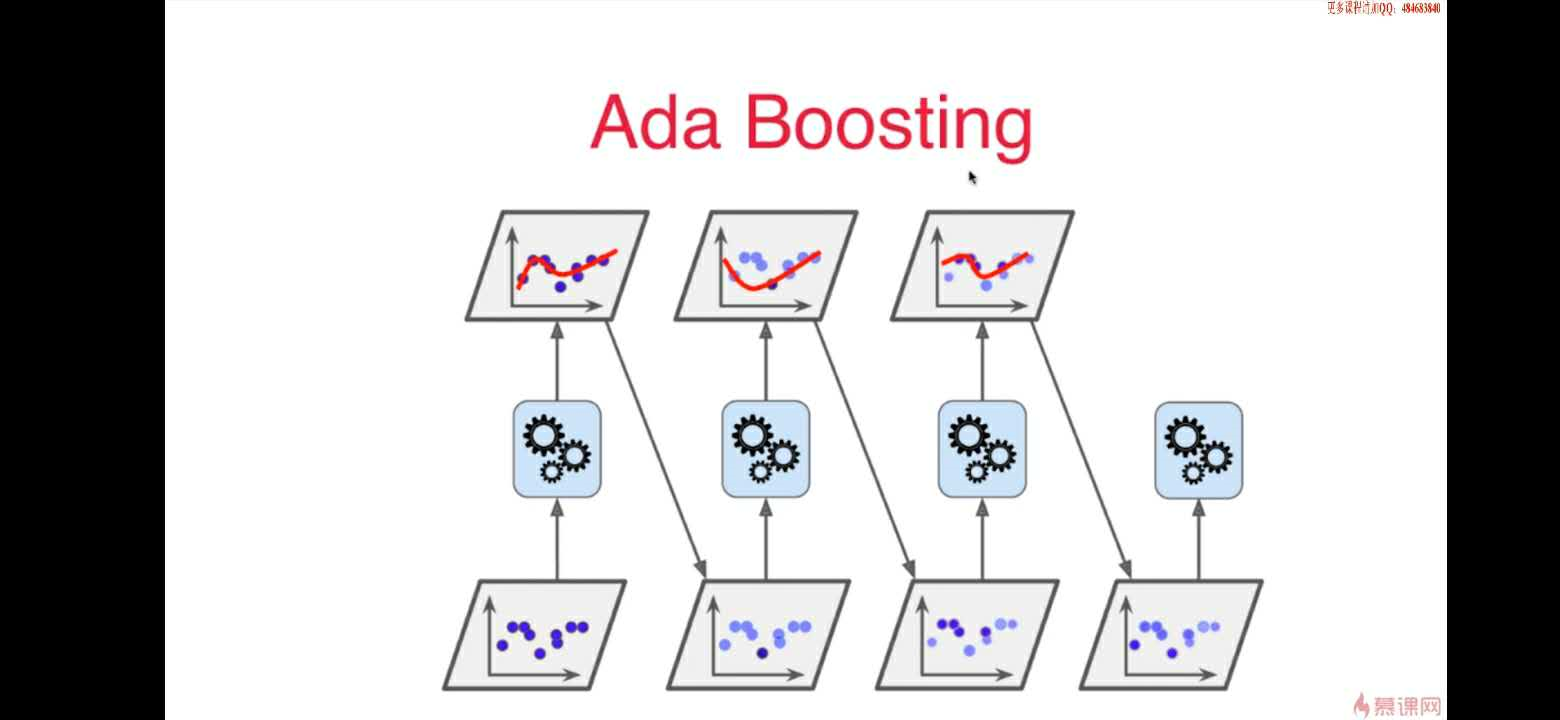

In [51]:
from sklearn.ensemble import AdaBoostRegressor
boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [52]:
ada = AdaBoostRegressor(Ridge(alpha=0.001), n_estimators=500)
ada.fit(X, y)

AdaBoostRegressor(base_estimator=Ridge(alpha=0.001, copy_X=True,
                                       fit_intercept=True, max_iter=None,
                                       normalize=False, random_state=None,
                                       solver='auto', tol=0.001),
                  learning_rate=1.0, loss='linear', n_estimators=500,
                  random_state=None)

In [53]:
y_pred = ada.predict(X)
mean_squared_error(y_pred, y)

14.892047142842875

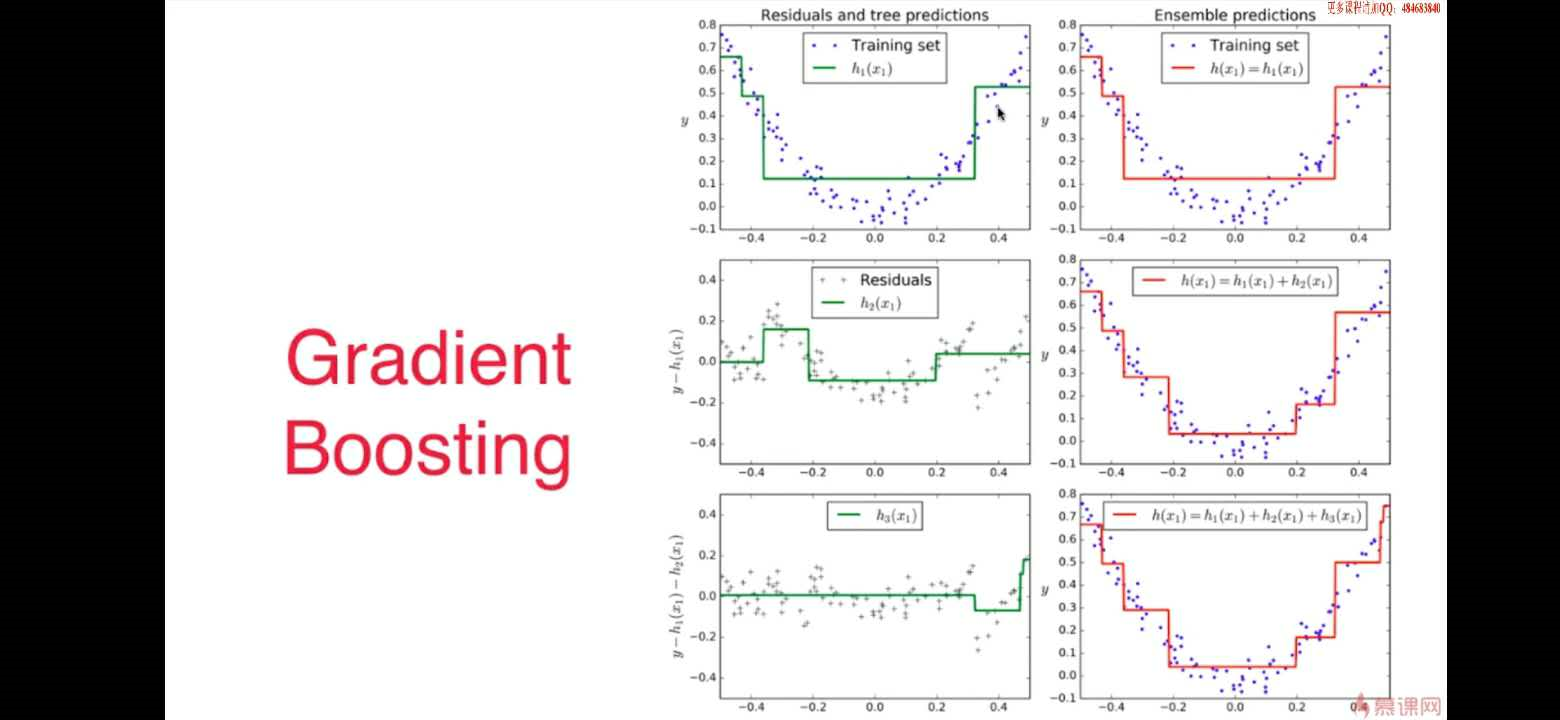
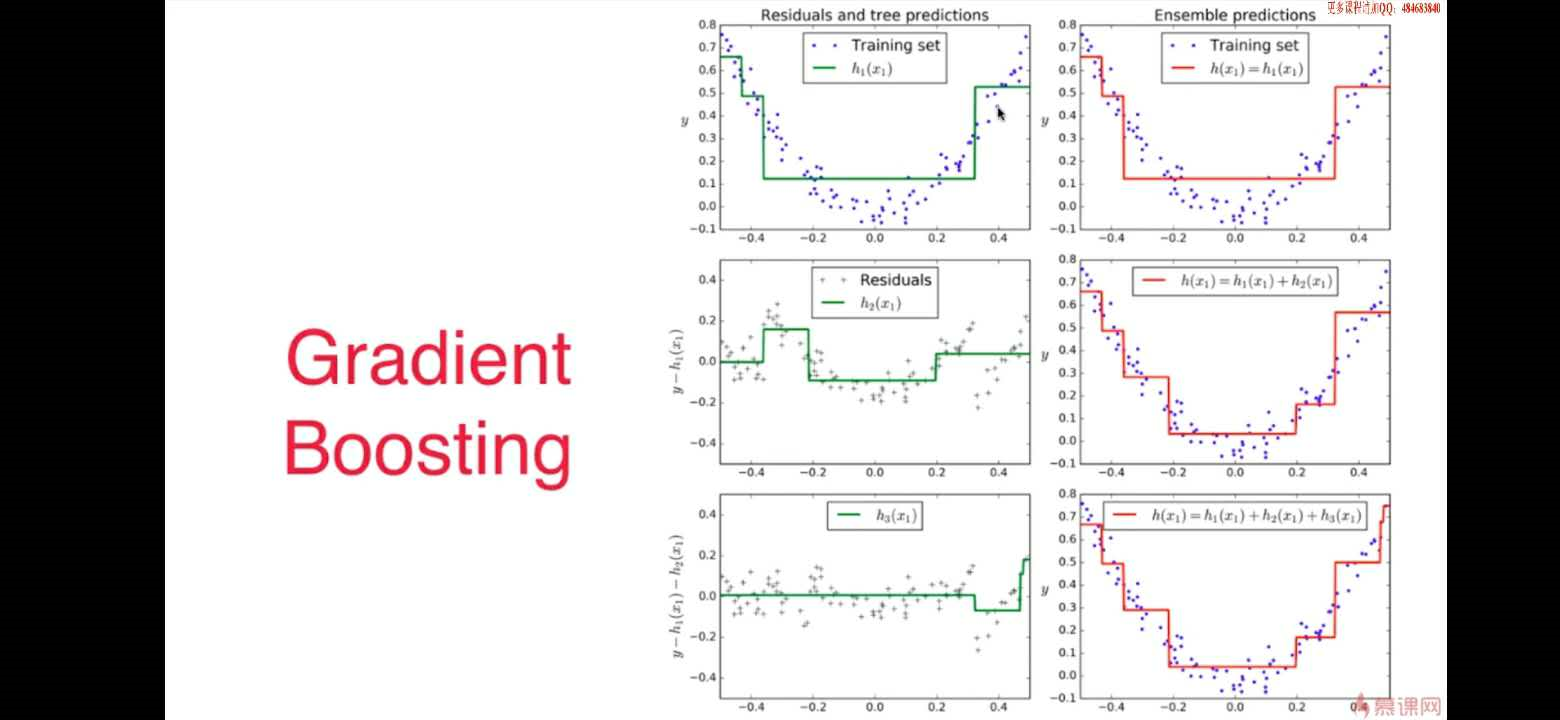

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

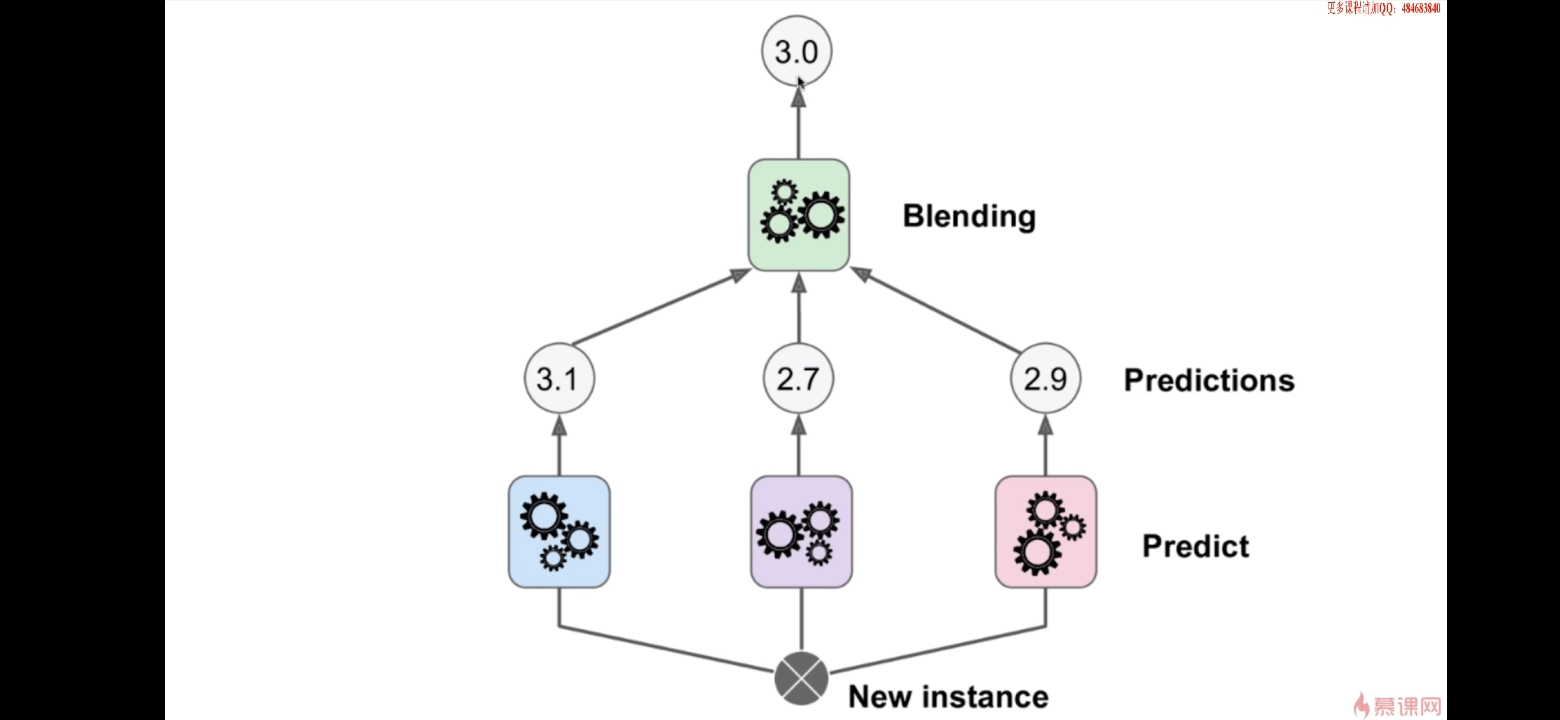

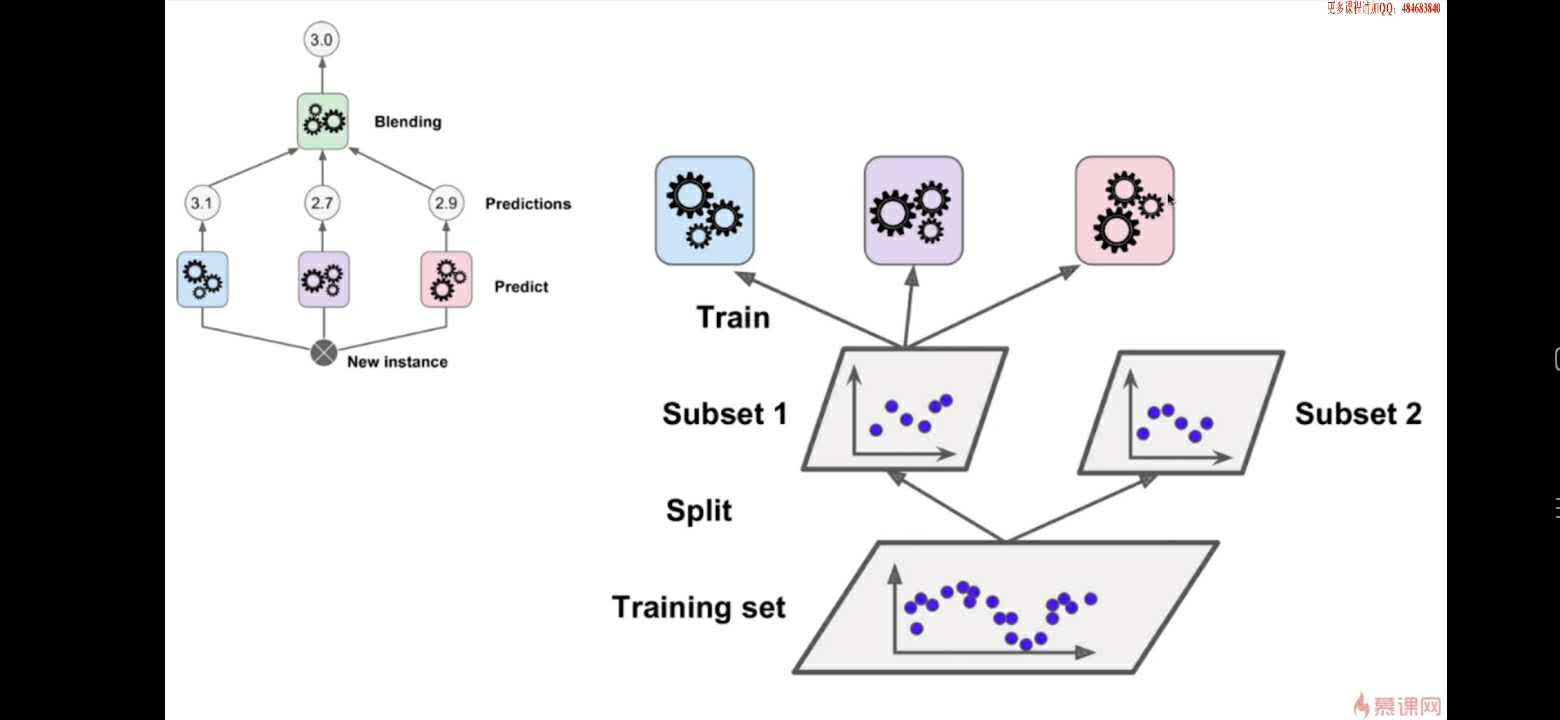

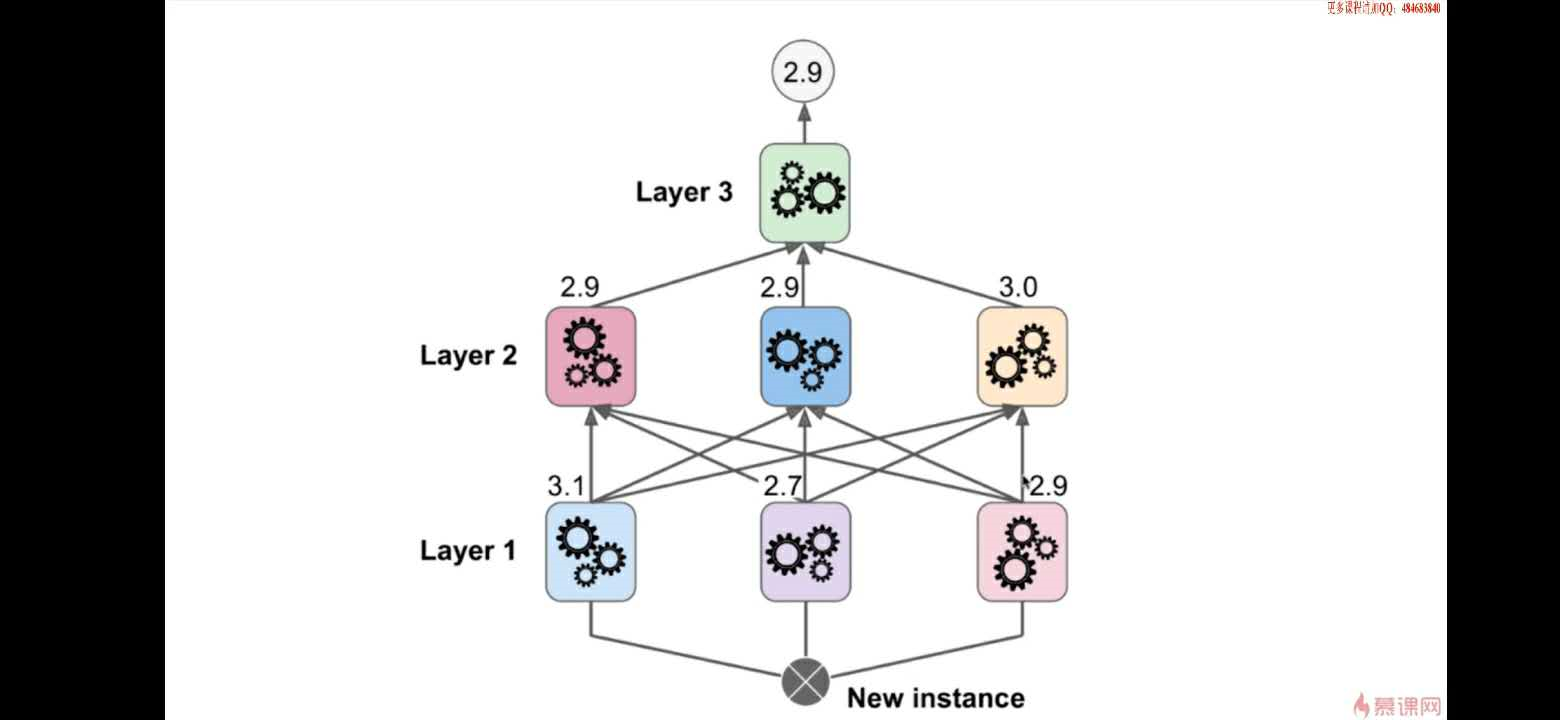